In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('real_drug_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
0,P0001,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5
1,P0002,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7
2,P0003,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4
3,P0004,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4
4,P0005,60,Male,Depression,Bupropion,850,35,Anxiety,5.3


In [3]:
df.drop('Patient_ID', axis=1, inplace=True)

In [4]:
df.tail()

,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
995,18,Male,Hypertension,Losartan,100,44,Headache,7.7
996,35,Female,Infection,Azithromycin,50,15,Nausea,5.3
997,49,Female,Depression,Sertraline,850,52,Dry mouth,8.0
998,64,Male,Depression,Escitalopram,850,36,Nausea,7.6
999,66,Female,Hypertension,Metoprolol,500,58,Tiredness,6.5


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,49.857,18.114267,18.0,35.0,50.0,66.0,79.0
Gender,1000,2,Male,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition,1000,5,Infection,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drug_Name,1000,15,Tramadol,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dosage_mg,1000.0,NaN,NaN,NaN,352.65,295.419617,50.0,100.0,250.0,500.0,850.0
Treatment_Duration_days,1000.0,NaN,NaN,NaN,32.38,15.69809,5.0,19.0,32.0,46.0,59.0
Side_Effects,1000,30,Nausea,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Improvement_Score,1000.0,NaN,NaN,NaN,7.0152,1.425609,2.5,6.1,7.0,8.0,10.0


In [7]:
df.isnull().sum()

Age                        0
Gender                     0
Condition                  0
Drug_Name                  0
Dosage_mg                  0
Treatment_Duration_days    0
Side_Effects               0
Improvement_Score          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Condition                1000 non-null   object 
 3   Drug_Name                1000 non-null   object 
 4   Dosage_mg                1000 non-null   int64  
 5   Treatment_Duration_days  1000 non-null   int64  
 6   Side_Effects             1000 non-null   object 
 7   Improvement_Score        1000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


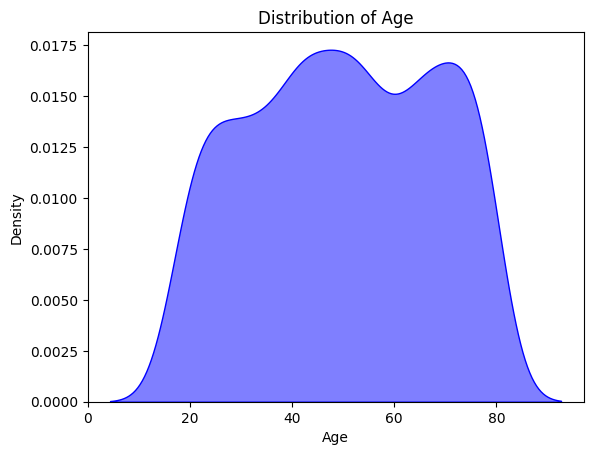

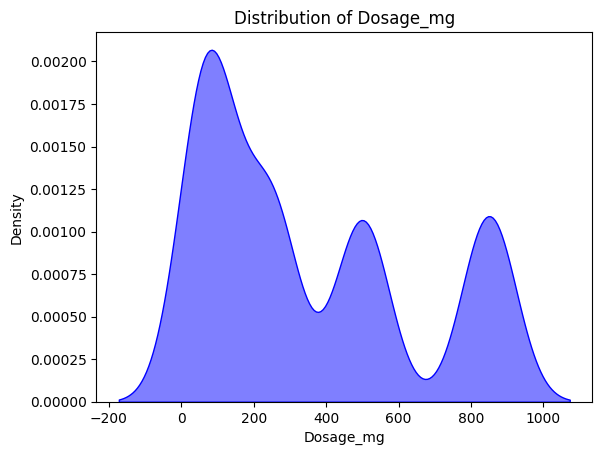

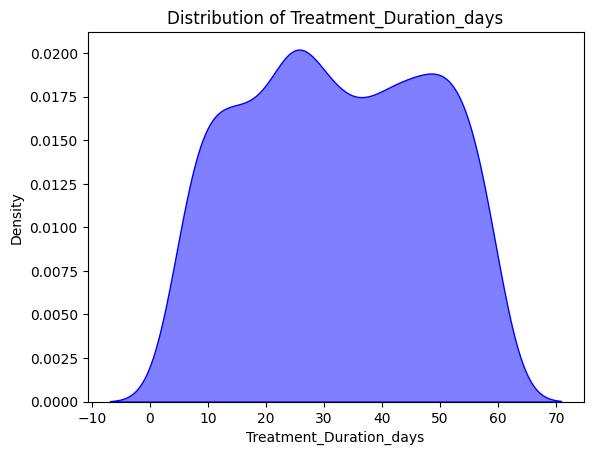

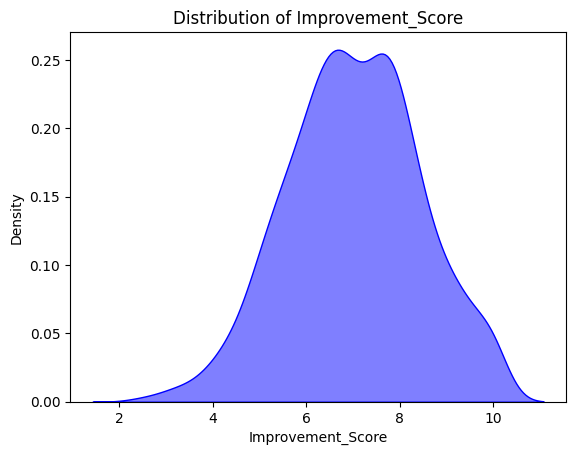

In [9]:
col=['Age', 'Dosage_mg', 'Treatment_Duration_days', 'Improvement_Score']
for column_name in col:
    sns.kdeplot(df[column_name], fill=True, alpha=0.5, color='blue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

In [10]:
df['Gender'].value_counts()

Gender
Male      523
Female    477
Name: count, dtype: int64

In [11]:
df['Condition'].value_counts()

Condition
Infection       215
Pain Relief     208
Diabetes        207
Hypertension    194
Depression      176
Name: count, dtype: int64

In [12]:
df['Drug_Name'].value_counts()

Drug_Name
Tramadol            82
Ciprofloxacin       79
Insulin Glargine    78
Amlodipine          74
Azithromycin        70
Glipizide           67
Bupropion           66
Losartan            66
Amoxicillin         66
Ibuprofen           64
Paracetamol         62
Metformin           62
Escitalopram        55
Sertraline          55
Metoprolol          54
Name: count, dtype: int64

In [13]:
df['Side_Effects'].value_counts()

Side_Effects
Nausea                 167
Dizziness               98
Headache                77
Fatigue                 48
Rash                    47
Diarrhea                37
Dry mouth               31
Stomach pain            29
Low blood sugar         27
Low sugar               27
Weight gain             26
Injection site pain     25
Back pain               25
Constipation            24
Anxiety                 24
Allergy                 23
Joint pain              23
Stomach upset           23
Insomnia                22
Sleep issues            21
Tiredness               20
Liver issues            20
Drowsiness              20
Heartburn               19
Skin rash               19
Swelling                18
Cough                   17
Sweating                16
Slow heartbeat          14
Abdominal pain          13
Name: count, dtype: int64

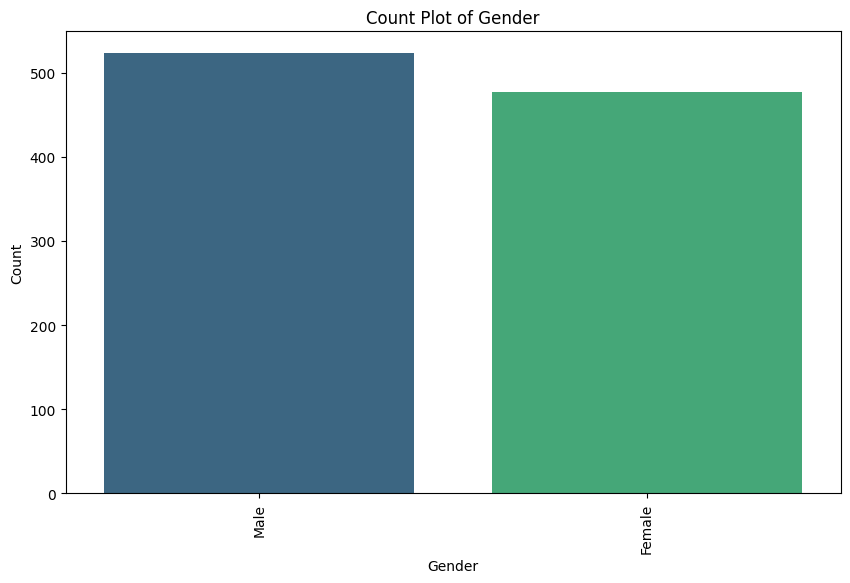

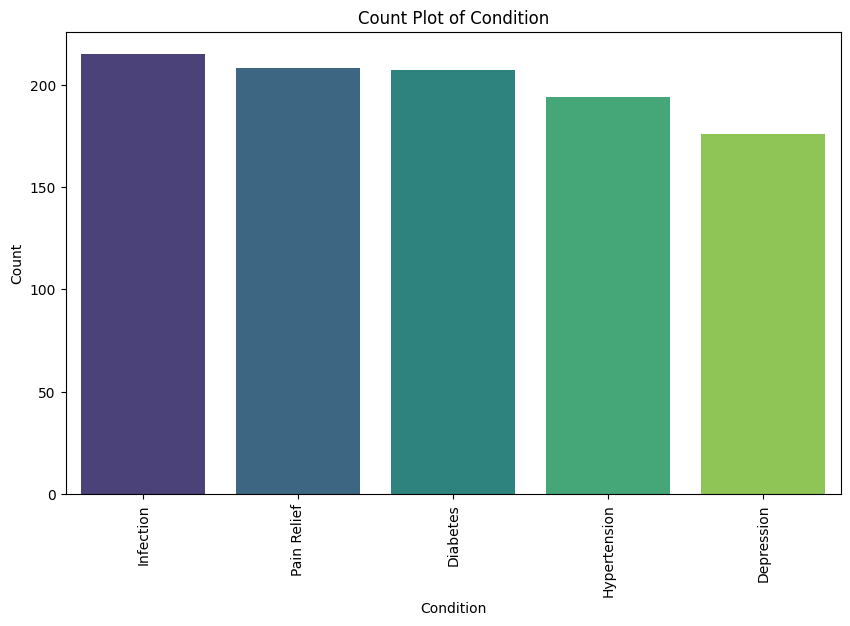

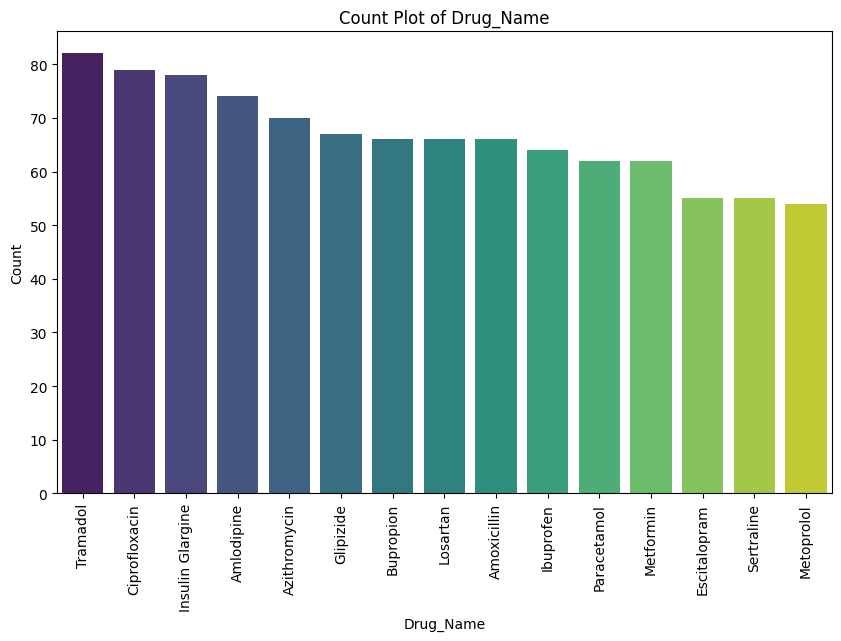

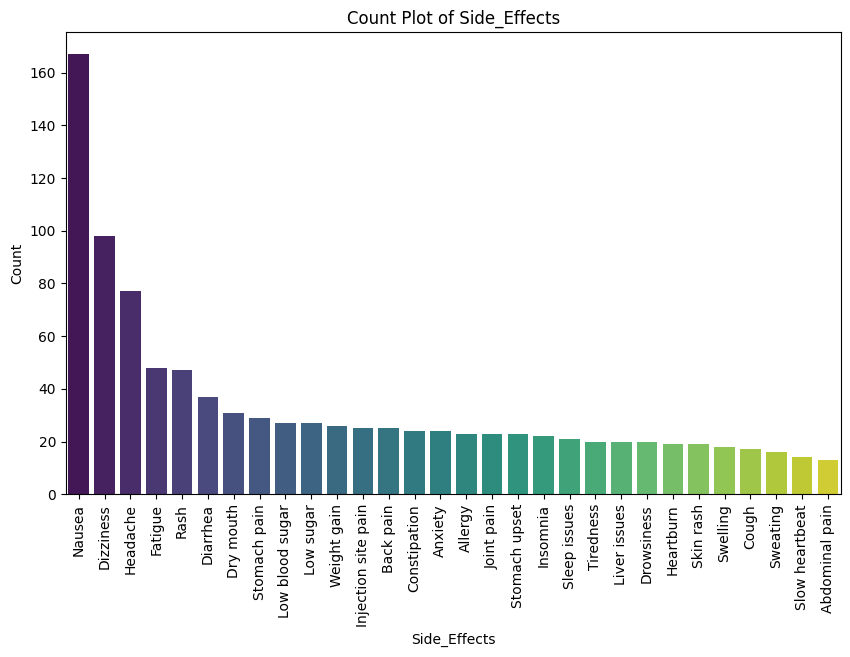

In [14]:
for col in ['Gender', 'Condition', 'Drug_Name', 'Side_Effects']:
    plt.figure(figsize=(10,6))
    sns.countplot(df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [15]:
df.groupby('Gender')['Condition'].value_counts()

Gender  Condition   
Female  Infection       114
        Diabetes        102
        Pain Relief      92
        Hypertension     85
        Depression       84
Male    Pain Relief     116
        Hypertension    109
        Diabetes        105
        Infection       101
        Depression       92
Name: count, dtype: int64

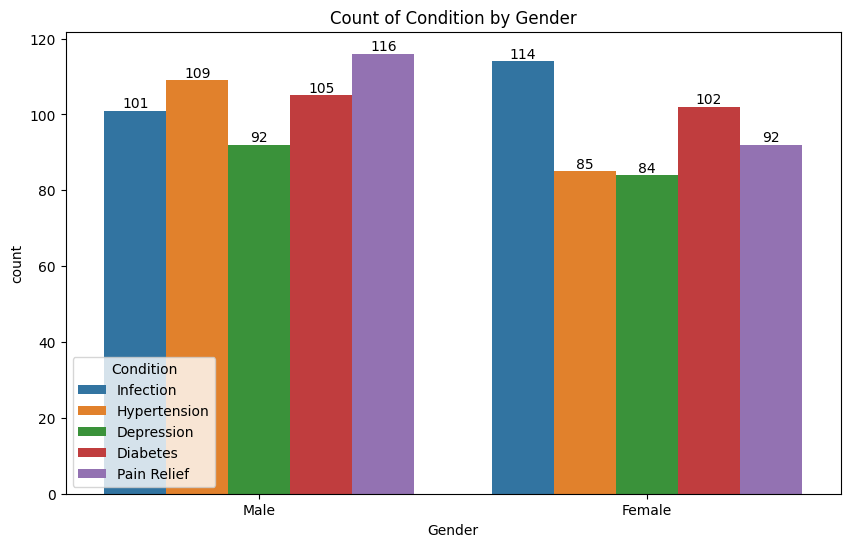

In [16]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df, x='Gender', hue='Condition')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Count of Condition by Gender')
plt.show()

In [17]:
df.groupby('Gender')['Drug_Name'].value_counts()

Gender  Drug_Name       
Female  Glipizide           39
        Amoxicillin         38
        Azithromycin        38
        Ciprofloxacin       38
        Insulin Glargine    38
        Amlodipine          35
        Bupropion           35
        Ibuprofen           35
        Tramadol            31
        Sertraline          27
        Metoprolol          26
        Paracetamol         26
        Metformin           25
        Losartan            24
        Escitalopram        22
Male    Tramadol            51
        Losartan            42
        Ciprofloxacin       41
        Insulin Glargine    40
        Amlodipine          39
        Metformin           37
        Paracetamol         36
        Escitalopram        33
        Azithromycin        32
        Bupropion           31
        Ibuprofen           29
        Amoxicillin         28
        Glipizide           28
        Metoprolol          28
        Sertraline          28
Name: count, dtype: int64

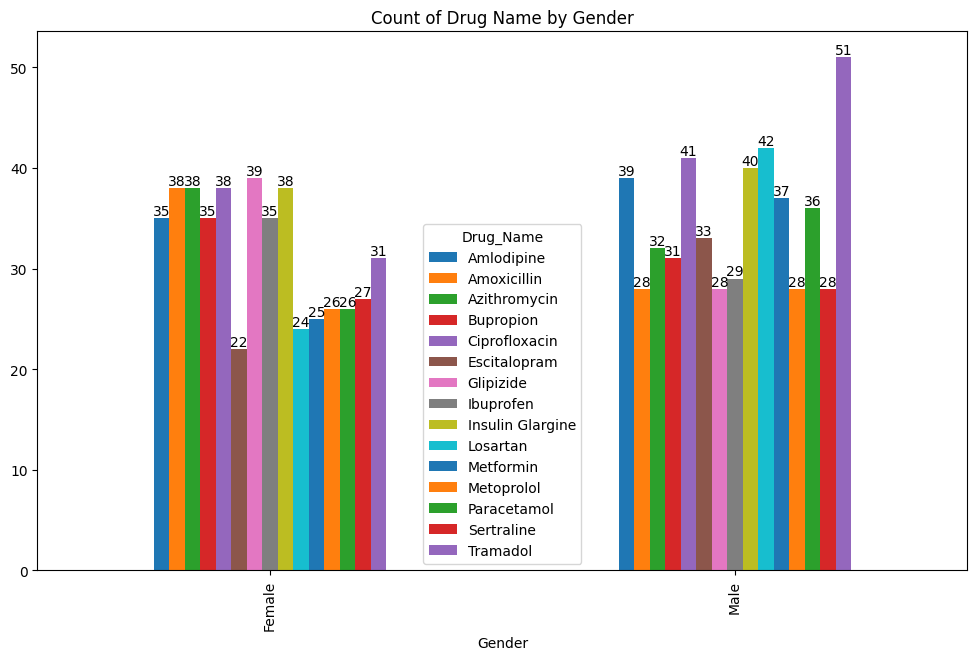

In [18]:
ax=df.groupby('Gender')['Drug_Name'].value_counts().unstack().plot(kind='bar', figsize=(12,7))
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Count of Drug Name by Gender')
plt.show()    

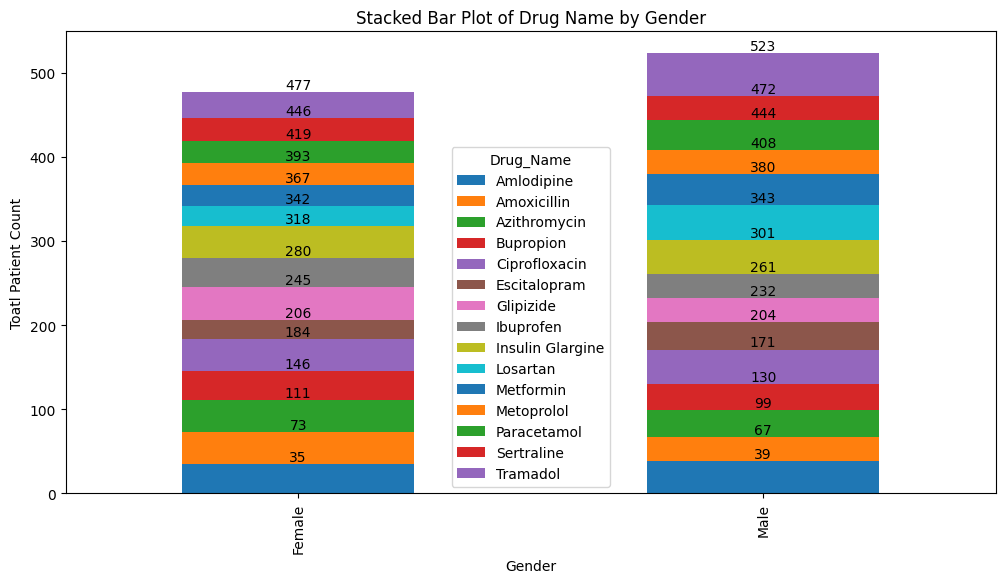

In [19]:
drug_gender=pd.crosstab(df['Gender'], df['Drug_Name'])
ax=drug_gender.plot(kind='bar', stacked=True, figsize=(12,6))
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Stacked Bar Plot of Drug Name by Gender')
ax.set_ylabel('Toatl Patient Count')
plt.show()

In [20]:
a1=df[df['Gender']=='Female']['Side_Effects'].value_counts().head(10)
a1

Side_Effects
Nausea                 87
Dizziness              41
Headache               32
Rash                   24
Fatigue                22
Stomach pain           19
Diarrhea               18
Dry mouth              14
Low blood sugar        14
Injection site pain    14
Name: count, dtype: int64

<Axes: xlabel='Side_Effects'>

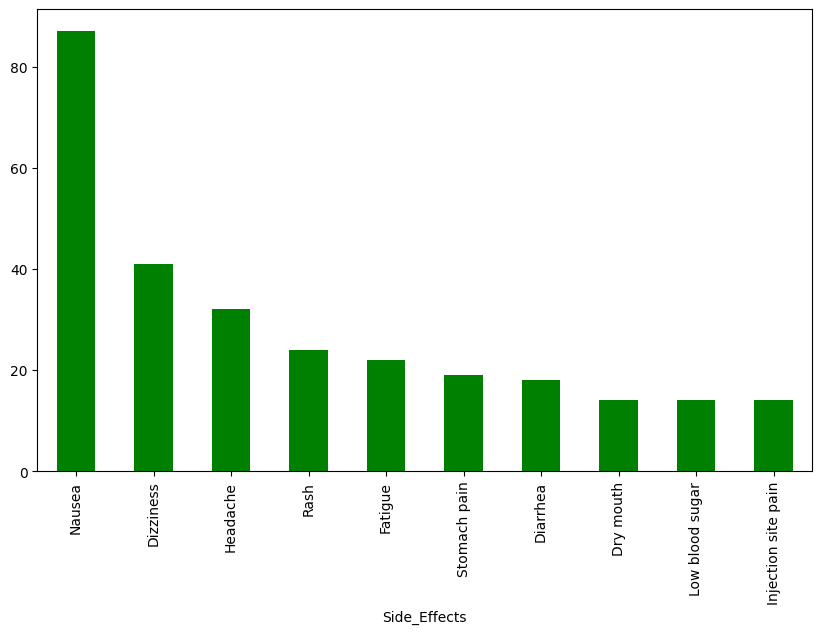

In [21]:
a1.plot(kind='bar', figsize=(10,6), color='green')

In [22]:
ax=df[df['Gender']=='Male']['Side_Effects'].value_counts().head(10)
ax

Side_Effects
Nausea          80
Dizziness       57
Headache        45
Fatigue         26
Rash            23
Diarrhea        19
Dry mouth       17
Back pain       16
Low sugar       15
Constipation    15
Name: count, dtype: int64

<Axes: xlabel='Side_Effects'>

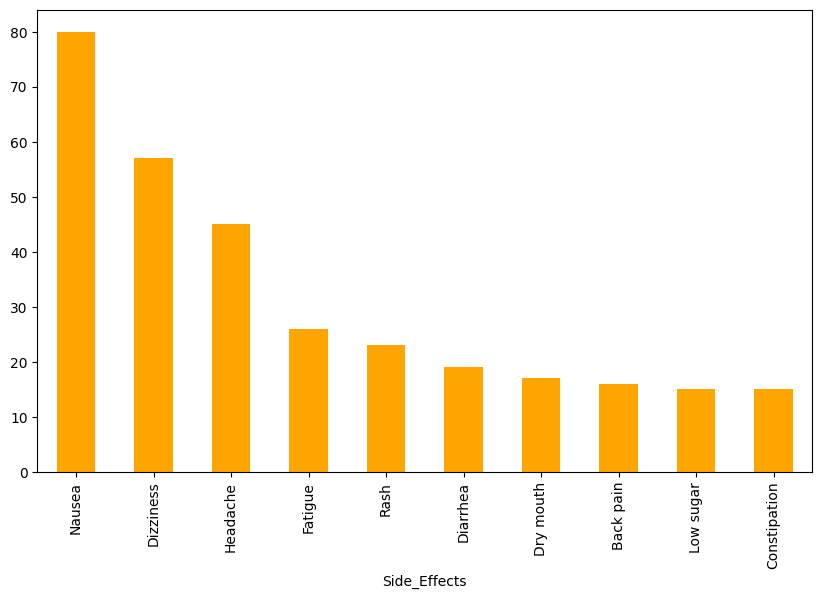

In [23]:
ax.plot(kind='bar', figsize=(10,6), color='orange')

In [24]:
df.groupby('Drug_Name')['Improvement_Score'].mean().sort_values(ascending=False).round(2)

Drug_Name
Insulin Glargine    7.21
Amoxicillin         7.17
Losartan            7.13
Bupropion           7.11
Paracetamol         7.08
Escitalopram        7.07
Sertraline          7.04
Glipizide           7.04
Metformin           7.03
Azithromycin        7.00
Ciprofloxacin       6.90
Ibuprofen           6.89
Tramadol            6.88
Metoprolol          6.88
Amlodipine          6.83
Name: Improvement_Score, dtype: float64

In [25]:
df.groupby('Dosage_mg')['Improvement_Score'].mean().sort_values(ascending=False).round(2)

Dosage_mg
100    7.16
850    7.13
500    7.01
250    6.95
50     6.83
Name: Improvement_Score, dtype: float64

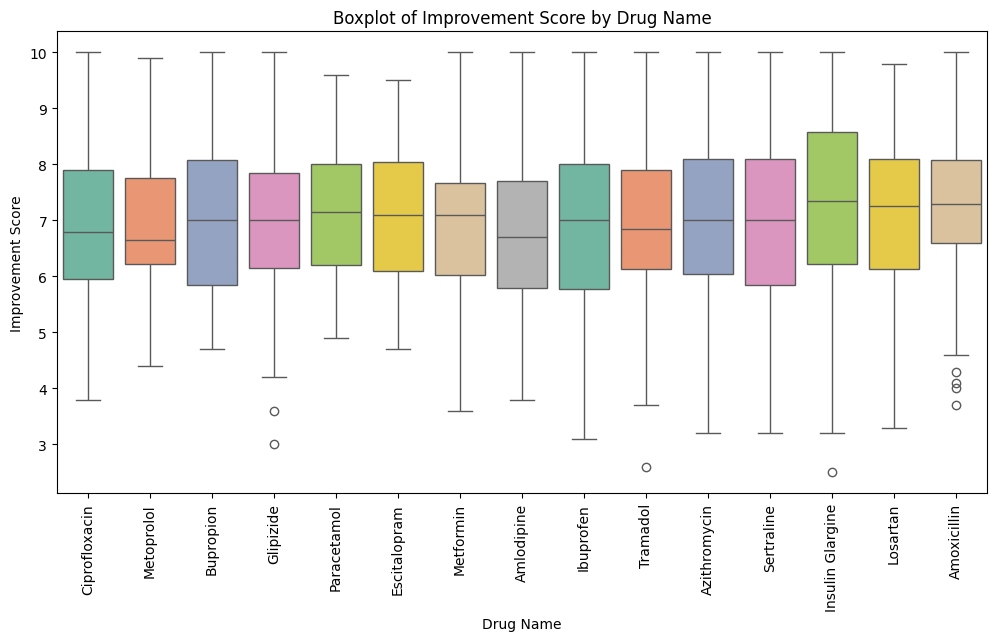

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(df, x='Drug_Name', y='Improvement_Score', palette='Set2')
plt.title('Boxplot of Improvement Score by Drug Name')
plt.xlabel('Drug Name')
plt.ylabel('Improvement Score')
plt.xticks(rotation=90)
plt.show()

In [27]:

"""
Q1=df['Improvement_Score'].quantile(0.25)
Q3=df['Improvement_Score'].quantile(0.75)
IOR=Q3-Q1
Lower_Bound=Q1-1.5*IOR
Upper_Bound=Q3+1.5*IOR
print('Lower Bound:', Lower_Bound)
print('Upper Bound:', Upper_Bound)

df_outliers=df[(df['Improvement_Score']>=Lower_Bound) & (df['Improvement_Score']<=Upper_Bound)]
data=df_outliers

"""

"\nQ1=df['Improvement_Score'].quantile(0.25)\nQ3=df['Improvement_Score'].quantile(0.75)\nIOR=Q3-Q1\nLower_Bound=Q1-1.5*IOR\nUpper_Bound=Q3+1.5*IOR\nprint('Lower Bound:', Lower_Bound)\nprint('Upper Bound:', Upper_Bound)\n\ndf_outliers=df[(df['Improvement_Score']>=Lower_Bound) & (df['Improvement_Score']<=Upper_Bound)]\ndata=df_outliers\n\n"

In [28]:
"""
sns.boxplot(y=df_outliers['Improvement_Score'], color='lightblue')
plt.title('Box Plot of Improvement Score')
plt.show()
"""

"\nsns.boxplot(y=df_outliers['Improvement_Score'], color='lightblue')\nplt.title('Box Plot of Improvement Score')\nplt.show()\n"

In [29]:
encode=pd.get_dummies(df[['Gender', 'Condition', 'Drug_Name', 'Side_Effects']], drop_first=True, dtype=int)
df_encode=pd.concat([df, encode], axis=1)
df_encode.drop(['Gender', 'Condition', 'Drug_Name', 'Side_Effects'], axis=1, inplace=True)
df_encode.head()

,Age,Dosage_mg,Treatment_Duration_days,Improvement_Score,Gender_Male,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,...,Side_Effects_Rash,Side_Effects_Skin rash,Side_Effects_Sleep issues,Side_Effects_Slow heartbeat,Side_Effects_Stomach pain,Side_Effects_Stomach upset,Side_Effects_Sweating,Side_Effects_Swelling,Side_Effects_Tiredness,Side_Effects_Weight gain
0,56,50,9,8.5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69,500,24,8.7,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46,100,25,5.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,850,44,6.4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,850,35,5.3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_encode.columns

Index(['Age', 'Dosage_mg', 'Treatment_Duration_days', 'Improvement_Score',
       'Gender_Male', 'Condition_Diabetes', 'Condition_Hypertension',
       'Condition_Infection', 'Condition_Pain Relief', 'Drug_Name_Amoxicillin',
       'Drug_Name_Azithromycin', 'Drug_Name_Bupropion',
       'Drug_Name_Ciprofloxacin', 'Drug_Name_Escitalopram',
       'Drug_Name_Glipizide', 'Drug_Name_Ibuprofen',
       'Drug_Name_Insulin Glargine', 'Drug_Name_Losartan',
       'Drug_Name_Metformin', 'Drug_Name_Metoprolol', 'Drug_Name_Paracetamol',
       'Drug_Name_Sertraline', 'Drug_Name_Tramadol', 'Side_Effects_Allergy',
       'Side_Effects_Anxiety', 'Side_Effects_Back pain',
       'Side_Effects_Constipation', 'Side_Effects_Cough',
       'Side_Effects_Diarrhea', 'Side_Effects_Dizziness',
       'Side_Effects_Drowsiness', 'Side_Effects_Dry mouth',
       'Side_Effects_Fatigue', 'Side_Effects_Headache',
       'Side_Effects_Heartburn', 'Side_Effects_Injection site pain',
       'Side_Effects_Insomnia', '

In [31]:
x=df_encode.drop('Improvement_Score', axis=1)
y=df_encode['Improvement_Score']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.coef_

array([ 0.0053477 ,  0.05536507,  0.03633629,  0.02016018,  0.0186118 ,
       -0.13293337,  0.00105445, -0.03272617,  0.13013727, -0.04213516,
       -0.033164  , -0.07832356,  0.1471808 , -0.03091726, -0.0562518 ,
        0.01585186, -0.04616362,  0.0456952 ,  0.07477492, -0.05255212,
        0.14279451,  0.04795892, -0.14427525,  0.02896638,  0.13533093,
       -0.09742226, -0.01993856, -0.13710049, -0.05837482, -0.09332557,
       -0.0412511 ,  0.04855021,  0.04231485,  0.04296766,  0.01111281,
       -0.22392986,  0.02777427,  0.0621119 , -0.01738439,  0.04130701,
       -0.0944029 , -0.00665999,  0.06633572, -0.14737423, -0.01441967,
        0.02117847, -0.01385063, -0.18437615,  0.00067442, -0.05200278,
       -0.02626161])

In [37]:
model.intercept_

np.float64(7.036187119650478)

In [38]:
model_train=model.predict(x_train)
model_test=model.predict(x_test)

In [39]:
mae_train_model=mean_absolute_error(y_train, model_train)
mae_test_model=mean_absolute_error(y_test, model_test)

print(f'Mean Absolute Error on Training Data: {mae_train_model:.3f}')
print(f'Mean Absolute Error on Testing Data: {mae_test_model:.3f}')

Mean Absolute Error on Training Data: 1.128
Mean Absolute Error on Testing Data: 1.171


In [40]:
mse_train_model=mean_squared_error(y_train, model_train)
mse_test_model=mean_squared_error(y_test, model_test)

print(f'Mean Squared Error on Training Data: {mse_train_model:.3f}')
print(f'Mean Squared Error on Testing Data: {mse_test_model:.3f}')

Mean Squared Error on Training Data: 1.949
Mean Squared Error on Testing Data: 2.082


In [41]:
r2_train_model=r2_score(y_train, model_train)
r2_test_model=r2_score(y_test, model_test)

print(f'R^2 on Training Data: {r2_train_model:.3f}')
print(f'R^2 on Testing Data: {r2_test_model:.3f}')

R^2 on Training Data: 0.051
R^2 on Testing Data: -0.077


In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
knn_train=knn.predict(x_train)
knn_test=knn.predict(x_test)

In [44]:
mae_train_knn=mean_absolute_error(y_train, knn_train)
mae_test_knn=mean_absolute_error(y_test, knn_test)

print(f'KNN Mean Absolute Error on Training Data: {mae_train_knn:.3f}')
print(f'KNN Mean Absolute Error on Testing Data: {mae_test_knn:.3f}')

KNN Mean Absolute Error on Training Data: 1.017
KNN Mean Absolute Error on Testing Data: 1.244


In [46]:
mse_train_knn=mean_squared_error(y_train, knn_train)
mse_test_knn=mean_squared_error(y_test, knn_test)

print(f'KNN Mean Squared Error on Training Data: {mse_train_knn:.3f}')
print(f'KNN Mean Squared Error on Testing Data: {mse_test_knn:.3f}')

KNN Mean Squared Error on Training Data: 1.584
KNN Mean Squared Error on Testing Data: 2.306


In [47]:
r2_train_knn=r2_score(y_train, knn_train)
r2_test_knn=r2_score(y_test, knn_test)

print(f'R^2 on Training Data: {r2_train_knn:.3f}')
print(f'R^2 on Testing Data: {r2_test_knn:.3f}')

R^2 on Training Data: 0.229
R^2 on Testing Data: -0.193
